<a href="https://colab.research.google.com/github/ingingppg/final-assignment-ml2020/blob/main/Classification_Task_Kuzushiji_Kanji.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 65 bytes


In [ ]:
!kaggle competitions download -c kuzushiji-ml-it-kmitl-2020

 98% 123M/126M [00:04<00:00, 22.3MB/s]
100% 126M/126M [00:04<00:00, 29.5MB/s]
 89% 28.0M/31.5M [00:00<00:00, 35.8MB/s]
100% 31.5M/31.5M [00:00<00:00, 45.8MB/s]
  0% 0.00/396k [00:00<?, ?B/s]
100% 396k/396k [00:00<00:00, 123MB/s]


In [ ]:
!unzip train-images.npy.zip

Archive:  train-images.npy.zip
  inflating: train-images.npy        


In [ ]:
!unzip test-images.npy.zip

Archive:  test-images.npy.zip
  inflating: test-images.npy         


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [ ]:
label = np.load("/content/train-labels.npy")

train = np.load("/content/train-images.npy")

test = np.load("/content/test-images.npy")

In [ ]:
train.shape

(101376, 64, 64)

In [ ]:
train[0][1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  28, 219, 243,  90,  17,   0,   1,   0,  27,   7,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
      dtype=uint8)

In [ ]:
train[0][2]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  41, 226, 255, 169,  39,   0,   1,  17,   3,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
      dtype=uint8)

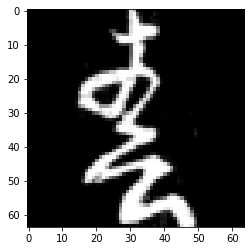

In [ ]:
plt.imshow(train[0], cmap="gray")
plt.show()

In [ ]:
#reshape array to 2d
nsamples, nx, ny = train.shape
kanji_train = train.reshape((nsamples,nx*ny))

nsamples, nx, ny = test.shape
kanji_test = test.reshape((nsamples,nx*ny))

In [ ]:
kanji_train[-1]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
mlp = MLPClassifier(random_state=99, max_iter=1000, alpha=1e-4, activation='logistic', hidden_layer_sizes=(10,5)) #max_iter, hidden_layer_sizes

In [ ]:
mlp.fit(kanji_train, label)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=99, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred = mlp.predict(kanji_test)

In [ ]:
# SAVE OUTPUT TO CSV

np.savetxt("submission.csv", np.dstack((np.arange(1, y_pred.size+1),y_pred))[0],"%d,%d",header="ImageId,ClassId", comments='')

In [ ]:
#commit submission

raise NotImplementedError()

!kaggle competitions submit -c kuzushiji-ml-it-kmitl-2020 -f submission.csv -m "Message"

100% 212k/212k [00:00<00:00, 224kB/s]
Successfully submitted to Kuzushiji Kanji Classification

In [ ]:
import pandas as pd

In [ ]:
imageid = np.arange(1,y_pred.shape[0]+1)

In [ ]:
submission = pd.DataFrame({
    'ImageId': imageid,
    'ClassId': y_pred
})

In [ ]:
submission.to_csv('submission_test.csv', index=False)